In [1]:
import numpy as np 
import pandas as pd 
import datetime as dt 

import matplotlib.pyplot as plt 
import matplotlib.dates as mdates 
import seaborn as sns

from matplotlib.offsetbox import AnchoredText
#plt.style.use('ggplot') # use ggplot style
%matplotlib inline 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv('sea_ice_extent.csv')

df.columns = ['Year', 'Month', 'Day', 'Extent', 'Missing', 'Source Data','hemisphere']

In [3]:
df.drop('Source Data', axis = 1, inplace = True)
df['Date'] = pd.to_datetime(df[['Year','Month','Day']])

# We will check the data by focusing on the northern hemisphere, where polar bears live.
south = df[df['hemisphere'] == 'south']

In [4]:
south.head()

,Year,Month,Day,Extent,Missing,hemisphere,Date
13177,1978,10,26,17.624,0.0,south,1978-10-26
13178,1978,10,28,17.803,0.0,south,1978-10-28
13179,1978,10,30,17.670,0.0,south,1978-10-30
13180,1978,11,1,17.527,0.0,south,1978-11-01
13181,1978,11,3,17.486,0.0,south,1978-11-03


In [5]:
south.dtypes

Year                   int64
Month                  int64
Day                    int64
Extent               float64
Missing              float64
hemisphere            object
Date          datetime64[ns]
dtype: object

Text(0.5, 0, 'Year')

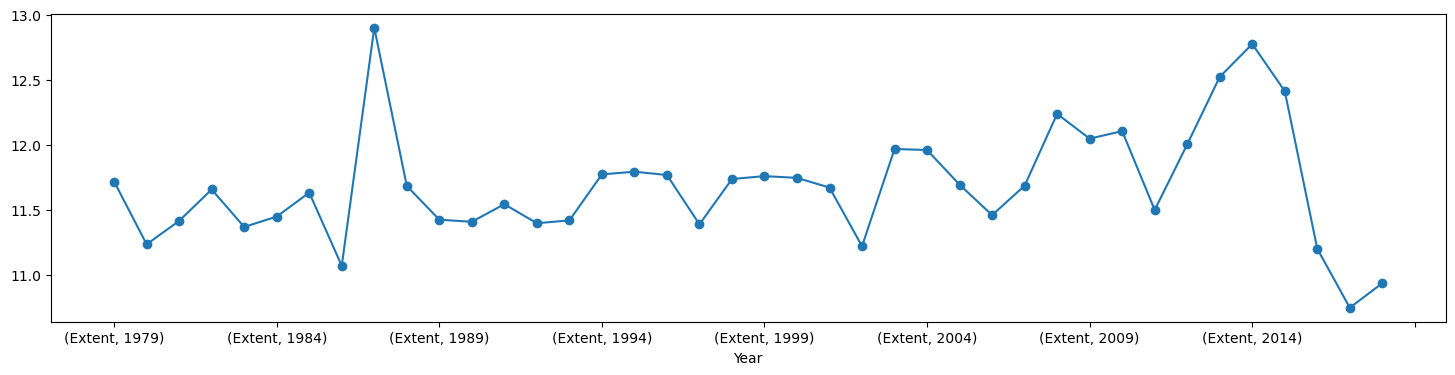

In [6]:
# Exclude data for 1978 and 2019 because not all months are available.
df_remove = south[(south['Year']!=1978)&(south['Year']!=2019)]

df_Year = df_remove[['Year','Extent']]
df_Year = df_Year.groupby('Year').mean().unstack()

ax = df_Year.plot(figsize=(18,4),marker='o')

plt.xlabel("Year")

C:\Users\Hp\AppData\Local\Temp\ipykernel_10772\2211913089.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Year_month["Year_month"] = pd.to_datetime(df_Year_month["Date"]).dt.strftime("%Y-%m")


Text(0.5, 0, 'Year_month')

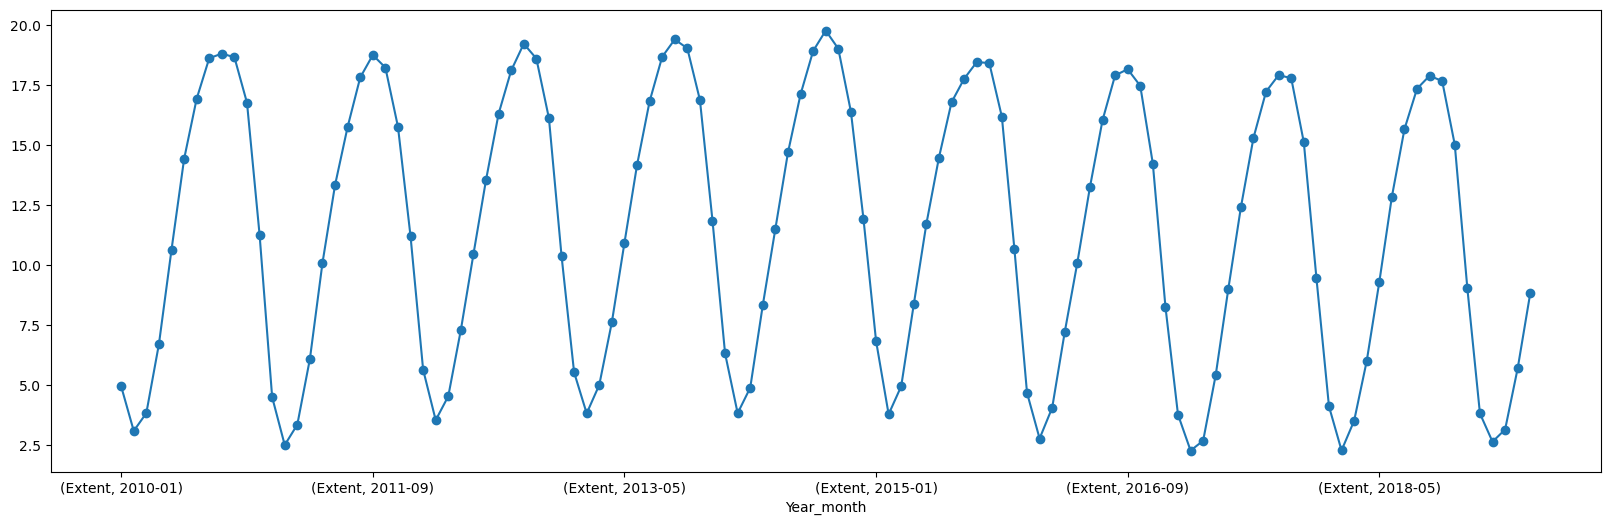

In [7]:
df_Year_month = south[south['Year']>=2010]

df_Year_month["Year_month"] = pd.to_datetime(df_Year_month["Date"]).dt.strftime("%Y-%m")

df_Year_month = df_Year_month[['Year_month','Extent']].groupby('Year_month').mean().unstack()

ax = df_Year_month.plot(figsize=(20,6),marker='o')

plt.xlabel("Year_month")

In [8]:
df_Month = df_remove[['Year','Extent','Month']].groupby(['Month','Year']).mean().unstack()

df_Month['79-85'] = df_Month.iloc[:,0:6].mean(axis=1)
df_Month['86-90'] = df_Month.iloc[:,7:11].mean(axis=1)
df_Month['91-95'] = df_Month.iloc[:,12:16].mean(axis=1)
df_Month['96-00'] = df_Month.iloc[:,17:21].mean(axis=1)
df_Month['01-05'] = df_Month.iloc[:,22:26].mean(axis=1)
df_Month['06-10'] = df_Month.iloc[:,27:31].mean(axis=1)
df_Month['11-18'] = df_Month.iloc[:,32:39].mean(axis=1)

df_Month = df_Month.iloc[:,40:47]

In [9]:
df_Month
#average of all ages by months

,79-85,86-90,91-95,96-00,01-05,06-10,11-18
Year,,,,,,,
Month,,,,,,,
1,4.864218,4.775554,4.865556,4.837290,5.333984,5.239298,5.337226
2,2.951497,3.077538,2.919550,2.857423,3.495718,3.110272,3.232588
3,3.766922,3.926158,3.899419,3.931532,4.362565,4.193734,4.224194
4,6.557389,6.444033,6.930183,6.879475,6.965033,7.117367,7.200314
5,9.845122,9.722286,10.179000,10.408621,10.261823,10.269790,10.545885
6,13.179267,13.011142,13.145367,13.487117,13.389800,13.650300,13.692438
7,15.975628,15.631905,15.898919,16.071161,16.000266,16.106516,16.294369
8,17.701344,17.421722,17.694339,17.816250,17.520492,17.880468,18.047779


Text(0.5, 0, 'Month')

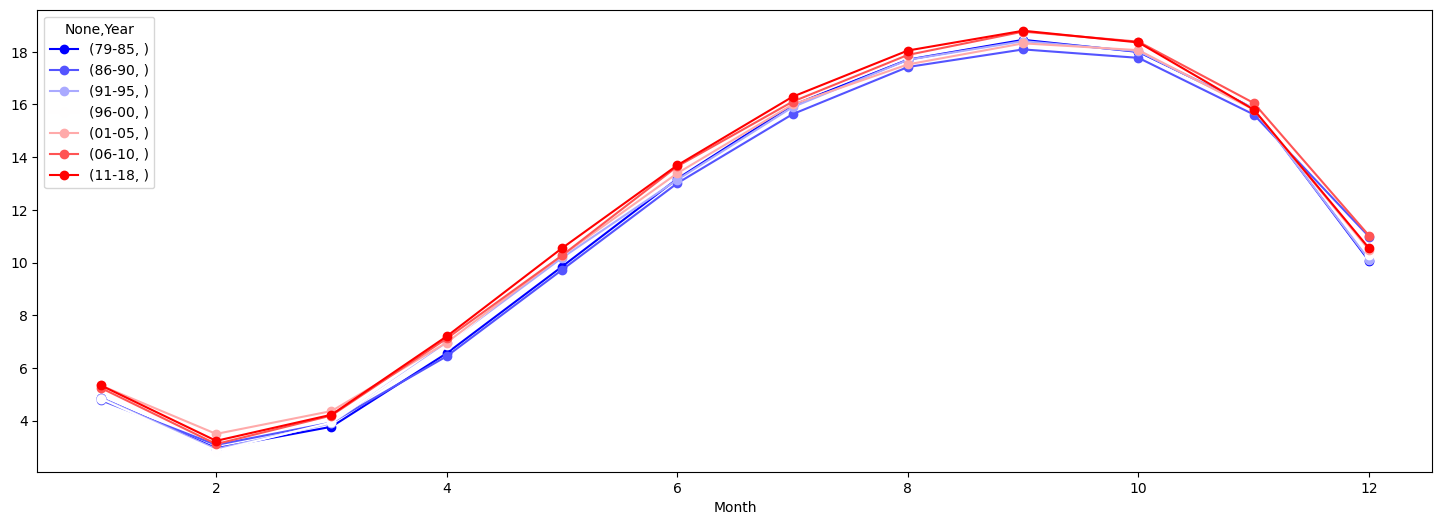

In [10]:
ax = df_Month.plot(figsize=(18,6),marker='o',colormap='bwr')

plt.xlabel("Month")

<Axes: >

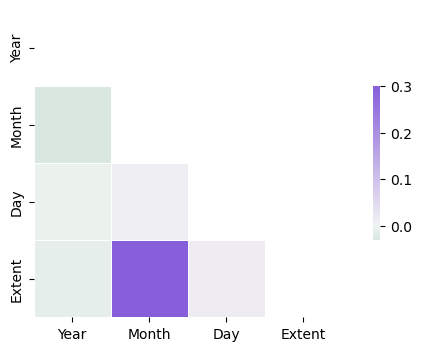

In [11]:
corr = south.drop(south.columns[[4,5,6]], axis=1).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 4))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(150, 275, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## linear regression

In [12]:
from statsmodels.tsa.deterministic import DeterministicProcess
from pandas import date_range
index = date_range("2000-1-1", freq="M", periods=1200)

index

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2099-03-31', '2099-04-30', '2099-05-31', '2099-06-30',
               '2099-07-31', '2099-08-31', '2099-09-30', '2099-10-31',
               '2099-11-30', '2099-12-31'],
              dtype='datetime64[ns]', length=1200, freq='M')

In [13]:
dp = DeterministicProcess(index, constant=True, order=1,drop=True)
dp.in_sample().head(8)

,const,trend
2000-01-31,1.0,1.0
2000-02-29,1.0,2.0
2000-03-31,1.0,3.0
2000-04-30,1.0,4.0
2000-05-31,1.0,5.0
2000-06-30,1.0,6.0
2000-07-31,1.0,7.0
2000-08-31,1.0,8.0


In [14]:
df_grouped_w = south[south['Year']>=2000]
df_grouped_w = df_grouped_w[['Date','Extent']].groupby([pd.Grouper(key='Date', freq='W')]).agg(mean = ('Extent', 'mean'))
df_grouped_w = df_grouped_w.reset_index()
df_grouped_w.head()

,Date,mean
0,2000-01-02,6.795000
1,2000-01-09,5.826571
2,2000-01-16,4.846571
3,2000-01-23,4.245714
4,2000-01-30,3.678429


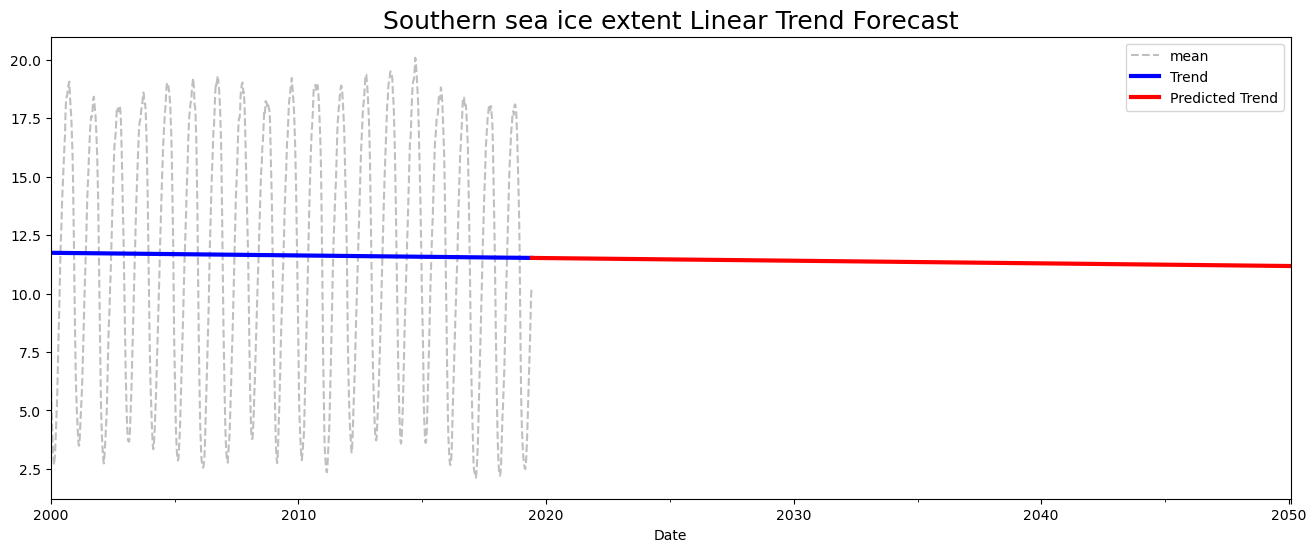

In [15]:
plt.figure(figsize=[16,6])

dp = DeterministicProcess(index=df_grouped_w['Date'], constant=True, order=1, drop=True)
dp.index.freq = 'W' # manually set 

X1 = dp.in_sample()
y1 = df_grouped_w["mean"]  # the target
y1.index = X1.index

model = LinearRegression(fit_intercept=False)
model.fit(X1, y1)
y1_pred = pd.Series(model.predict(X1), index=X1.index)


X2 = dp.out_of_sample(steps=1600)
y2_fore = pd.Series(model.predict(X2), index=X2.index)
y2_fore.head()
ax2 = y1.plot(linestyle='dashed', label="mean", color="0.75", use_index=True)
ax2 = y1_pred.plot(linewidth=3, label="Trend", color='b', use_index=True)
ax2 = y2_fore.plot(linewidth=3, label="Predicted Trend", color='r', use_index=True)
ax2.set_title("Southern sea ice extent Linear Trend Forecast", fontsize=18)  
_ = ax2.legend()

plt.show()

In [16]:
df_Feb = south[(south['Year']>=2000) & (south['Month']==2)]

df_Feb = df_Feb[['Year','Extent']].groupby('Year').mean().unstack()

df_Feb = pd.DataFrame(df_Feb)
df_Feb = df_Feb.reset_index()

df_Feb.columns = ['Extent','Year','mean']
df_Feb = df_Feb[['Year','mean']]
df_Feb

,Year,mean
0,2000,2.906517
1,2001,3.650357
2,2002,2.960393
3,2003,3.788571
4,2004,3.583552
5,2005,2.969607
6,2006,2.651393
7,2007,2.904607
8,2008,3.894517
9,2009,2.990571


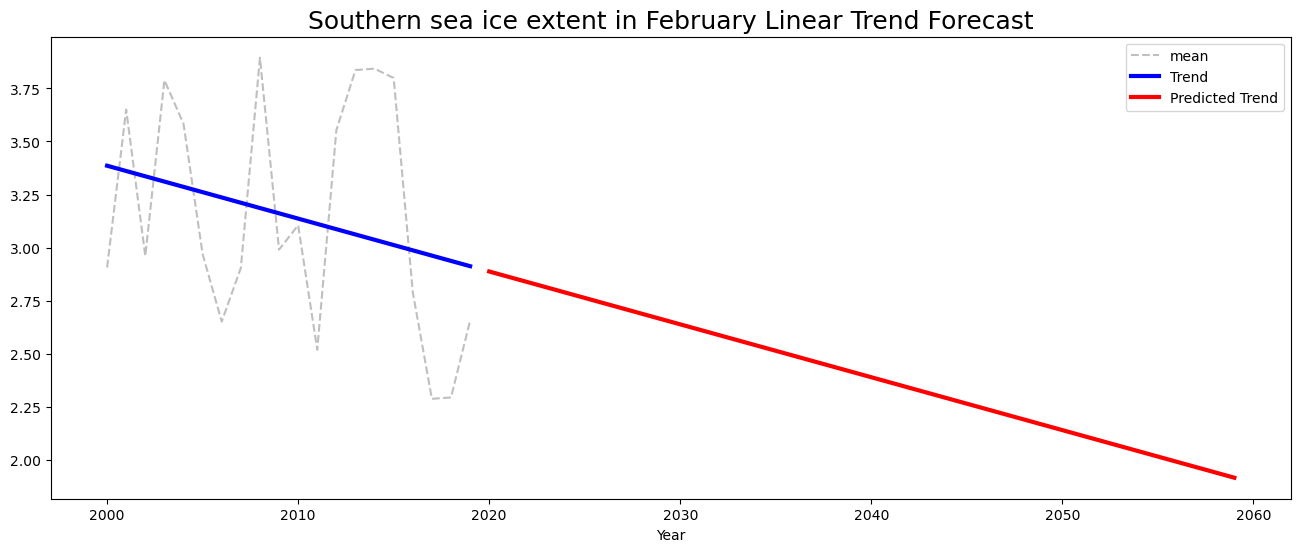

In [17]:
plt.figure(figsize=[16,6])

dp = DeterministicProcess(index=df_Feb['Year'], constant=True, order=1, drop=True)
dp.index.freq = 'Y' # manually set
# 'in_sample' creates features for the dates given in the `index` argument
X1 = dp.in_sample()
y1 = df_Feb["mean"]  # the target
y1.index = X1.index

model = LinearRegression(fit_intercept=False)
model.fit(X1, y1)
y1_pred = pd.Series(model.predict(X1), index=X1.index)

# forecast Trend for future 30 steps
X2 = dp.out_of_sample(steps=40)
y2_fore = pd.Series(model.predict(X2), index=X2.index)
y2_fore.head()
ax2 = y1.plot(linestyle='dashed', label="mean", color="0.75", use_index=True)
ax2 = y1_pred.plot(linewidth=3, label="Trend", color='b', use_index=True)
ax2 = y2_fore.plot(linewidth=3, label="Predicted Trend", color='r', use_index=True)
ax2.set_title("Southern sea ice extent in February Linear Trend Forecast", fontsize=18)  
_ = ax2.legend()

plt.show()

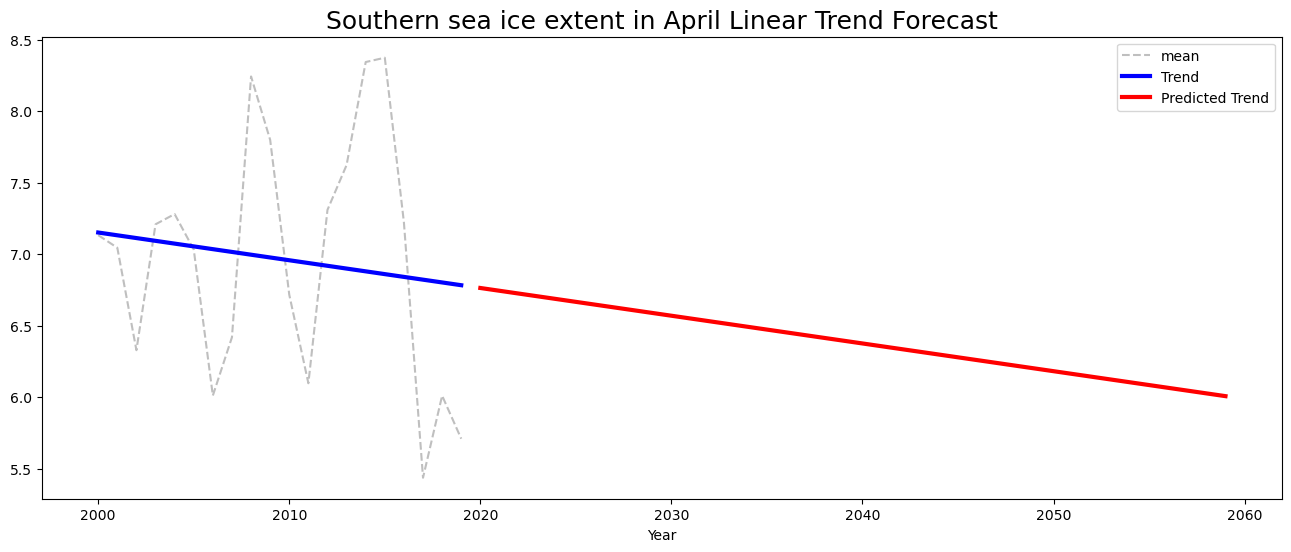

In [24]:

df_J = south[(south['Year']>=2000) & (south['Month']==4)]

df_J = df_J[['Year','Extent']].groupby('Year').mean().unstack()

df_J = pd.DataFrame(df_J)
df_J = df_J.reset_index()

df_J.columns = ['Extent','Year','mean']
df_J = df_J[['Year','mean']]

index = date_range("2000-1-1", freq="A", periods=9)
dp = DeterministicProcess(index, constant=True, order=1,drop=True)


plt.figure(figsize=[16,6])

dp = DeterministicProcess(index=df_J['Year'], constant=True, order=1, drop=True)
dp.index.freq = 'Y' # manually set the frequency of the index
# 'in_sample' creates features for the dates given in the `index` argument
X1 = dp.in_sample()
y1 = df_J["mean"]  # the target
y1.index = X1.index

model = LinearRegression(fit_intercept=False)
model.fit(X1, y1)
y1_pred = pd.Series(model.predict(X1), index=X1.index)

# forecast Trend for future 30 steps
X2 = dp.out_of_sample(steps=40)
y2_fore = pd.Series(model.predict(X2), index=X2.index)
y2_fore.head()
ax2 = y1.plot(linestyle='dashed', label="mean", color="0.75", use_index=True)
ax2 = y1_pred.plot(linewidth=3, label="Trend", color='b', use_index=True)
ax2 = y2_fore.plot(linewidth=3, label="Predicted Trend", color='r', use_index=True)
ax2.set_title("Southern sea ice extent in April Linear Trend Forecast", fontsize=18)  
_ = ax2.legend()

plt.show()
